# <font color = "blue" >Understanding the data





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Training Data**

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
df.shape

(43152, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [ ]:
df.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [ ]:
df.rename(columns = {"carat":"Weight", "cut":'Quality', "x":"Length_in_mm","y": "Width_in_mm", "z":"Depth_in_mm"}, inplace = True)
df.drop(columns = "Id", inplace = True)

In [ ]:
df.describe()

,Weight,depth,table,price,Length_in_mm,Width_in_mm,Depth_in_mm
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
missing = df[(df.Length_in_mm == 0) | (df.Width_in_mm == 0) | (df.Length_in_mm == 0) ]
missing.count()

Weight          5
Quality         5
color           5
clarity         5
depth           5
table           5
price           5
Length_in_mm    5
Width_in_mm     5
Depth_in_mm     5
dtype: int64

In [ ]:
df.drop(labels = missing.index , axis = 0, inplace = True)


**Testing Data**

In [ ]:
df_test = pd.read_csv("/content/test.csv")
df_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [ ]:
df_test.shape

(10788, 10)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [ ]:
df_test.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df_test.duplicated().sum()

0

In [ ]:
df_test.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
df_test.rename(columns = {"carat":"Weight", "cut":'Quality', "x":"Length_in_mm","y": "Width_in_mm", "z":"Depth_in_mm"}, inplace = True)

In [ ]:
df_test.drop(columns = "Id", inplace = True, axis = 1)

In [ ]:
df_test.describe()

,Weight,depth,table,Length_in_mm,Width_in_mm,Depth_in_mm
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.798279,61.758315,57.452531,5.729514,5.732559,3.539398
std,0.475700,1.421266,2.236933,1.123736,1.115090,0.695483
min,0.200000,54.000000,50.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.720000,4.727500,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000
max,4.500000,79.000000,73.000000,10.230000,10.160000,6.720000


In [ ]:
missing_test = df_test[(df_test.Length_in_mm == 0) | (df_test.Width_in_mm == 0) | (df_test.Length_in_mm == 0) ]
missing_test.count()

Weight          3
Quality         3
color           3
clarity         3
depth           3
table           3
Length_in_mm    3
Width_in_mm     3
Depth_in_mm     3
dtype: int64

In [ ]:
df_test.drop(labels = missing_test.index , axis = 0, inplace = True)

In [ ]:
df.clarity.value_counts()

SI1     10428
VS2      9823
SI2      7429
VS1      6474
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

Text(0.5, 1.0, 'colors of diamonds')

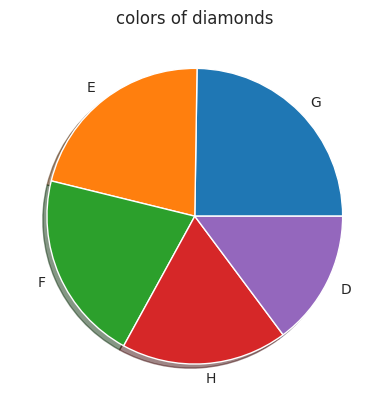

In [ ]:
indx_v = df.color.value_counts()
index = indx_v.index[:5]
value = indx_v.values[:5]
plt.pie( value, labels = index, shadow = True)
plt.title("colors of diamonds")

In [ ]:
indx_v = df[df.clarity == "SI2"].color.value_counts() # more demand for it is edu to  (h) weight & (h) color
clarities =  [	  "IF", "VVS1" , "VVS2" ,"VS1" , "VS2" , "SI1", "SI2"	, "I1"]
for c in clarities :
  print(f"--------{c}---------")
  print(df[df.clarity == c].color.value_counts())


--------IF---------
G    539
F    318
H    244
E    124
I    119
D     56
J     42
Name: color, dtype: int64
--------VVS1---------
G    800
F    580
E    519
H    472
I    282
D    195
J     56
Name: color, dtype: int64
--------VVS2---------
G    1155
F     785
E     774
H     486
D     445
I     294
J     102
Name: color, dtype: int64
--------VS1---------
G    1727
F    1069
E    1024
H     937
I     744
D     535
J     438
Name: color, dtype: int64
--------VS2---------
E    1984
G    1881
F    1773
D    1362
H    1304
I     918
J     601
Name: color, dtype: int64
--------SI1---------
E    1935
H    1784
F    1700
D    1697
G    1584
I    1105
J     623
Name: color, dtype: int64
--------SI2---------
E    1392
F    1290
H    1286
G    1243
D    1099
I     730
J     389
Name: color, dtype: int64
--------I1---------
H    136
G    130
F    116
E     80
I     73
J     39
D     32
Name: color, dtype: int64


In [ ]:
df[df.clarity == "I1"].color.value_counts()

H    136
G    130
F    116
E     80
I     73
J     39
D     32
Name: color, dtype: int64

[0.03, 0.07, 0.09, 0.15, 0.23, 0.24, 0.17, 0.01]


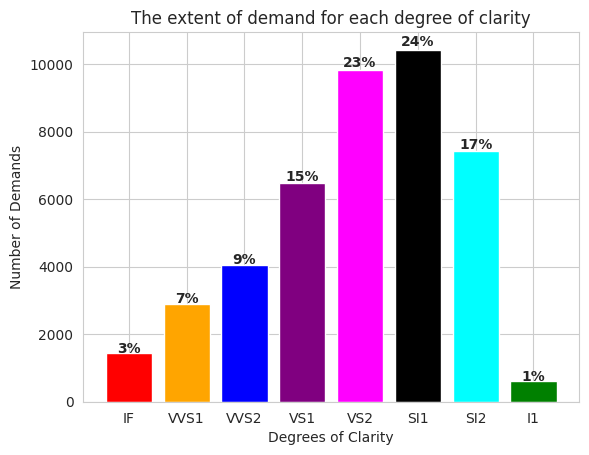

In [ ]:
x_axis =  [	  "IF", "VVS1" , "VVS2" ,"VS1" , "VS2" , "SI1", "SI2"	, "I1"]

y_axis = [df.clarity.value_counts()[e] for e in x_axis ]
colors_list = ['Red','Orange', 'Blue', 'Purple', "fuchsia", "black", "cyan", "green"]
graph = plt.bar(x_axis,y_axis, color = colors_list)
plt.title('The extent of demand for each degree of clarity')
plt.xlabel('Degrees of Clarity')
plt.ylabel('Number of Demands')

percent = []
for x in x_axis:
  value = (df.clarity.value_counts()[x])/ df.shape[0]
  percent.append((round(value, 2)))
print(percent)
i = 0
for p in graph:
	width = p.get_width()
	height = p.get_height()
	x, y = p.get_xy()
	plt.text(x+width/2,
			y+height*1.01,
			str(int(percent[i]*100))+'%',
			ha='center',
			weight='bold')
	i+=1
plt.show()

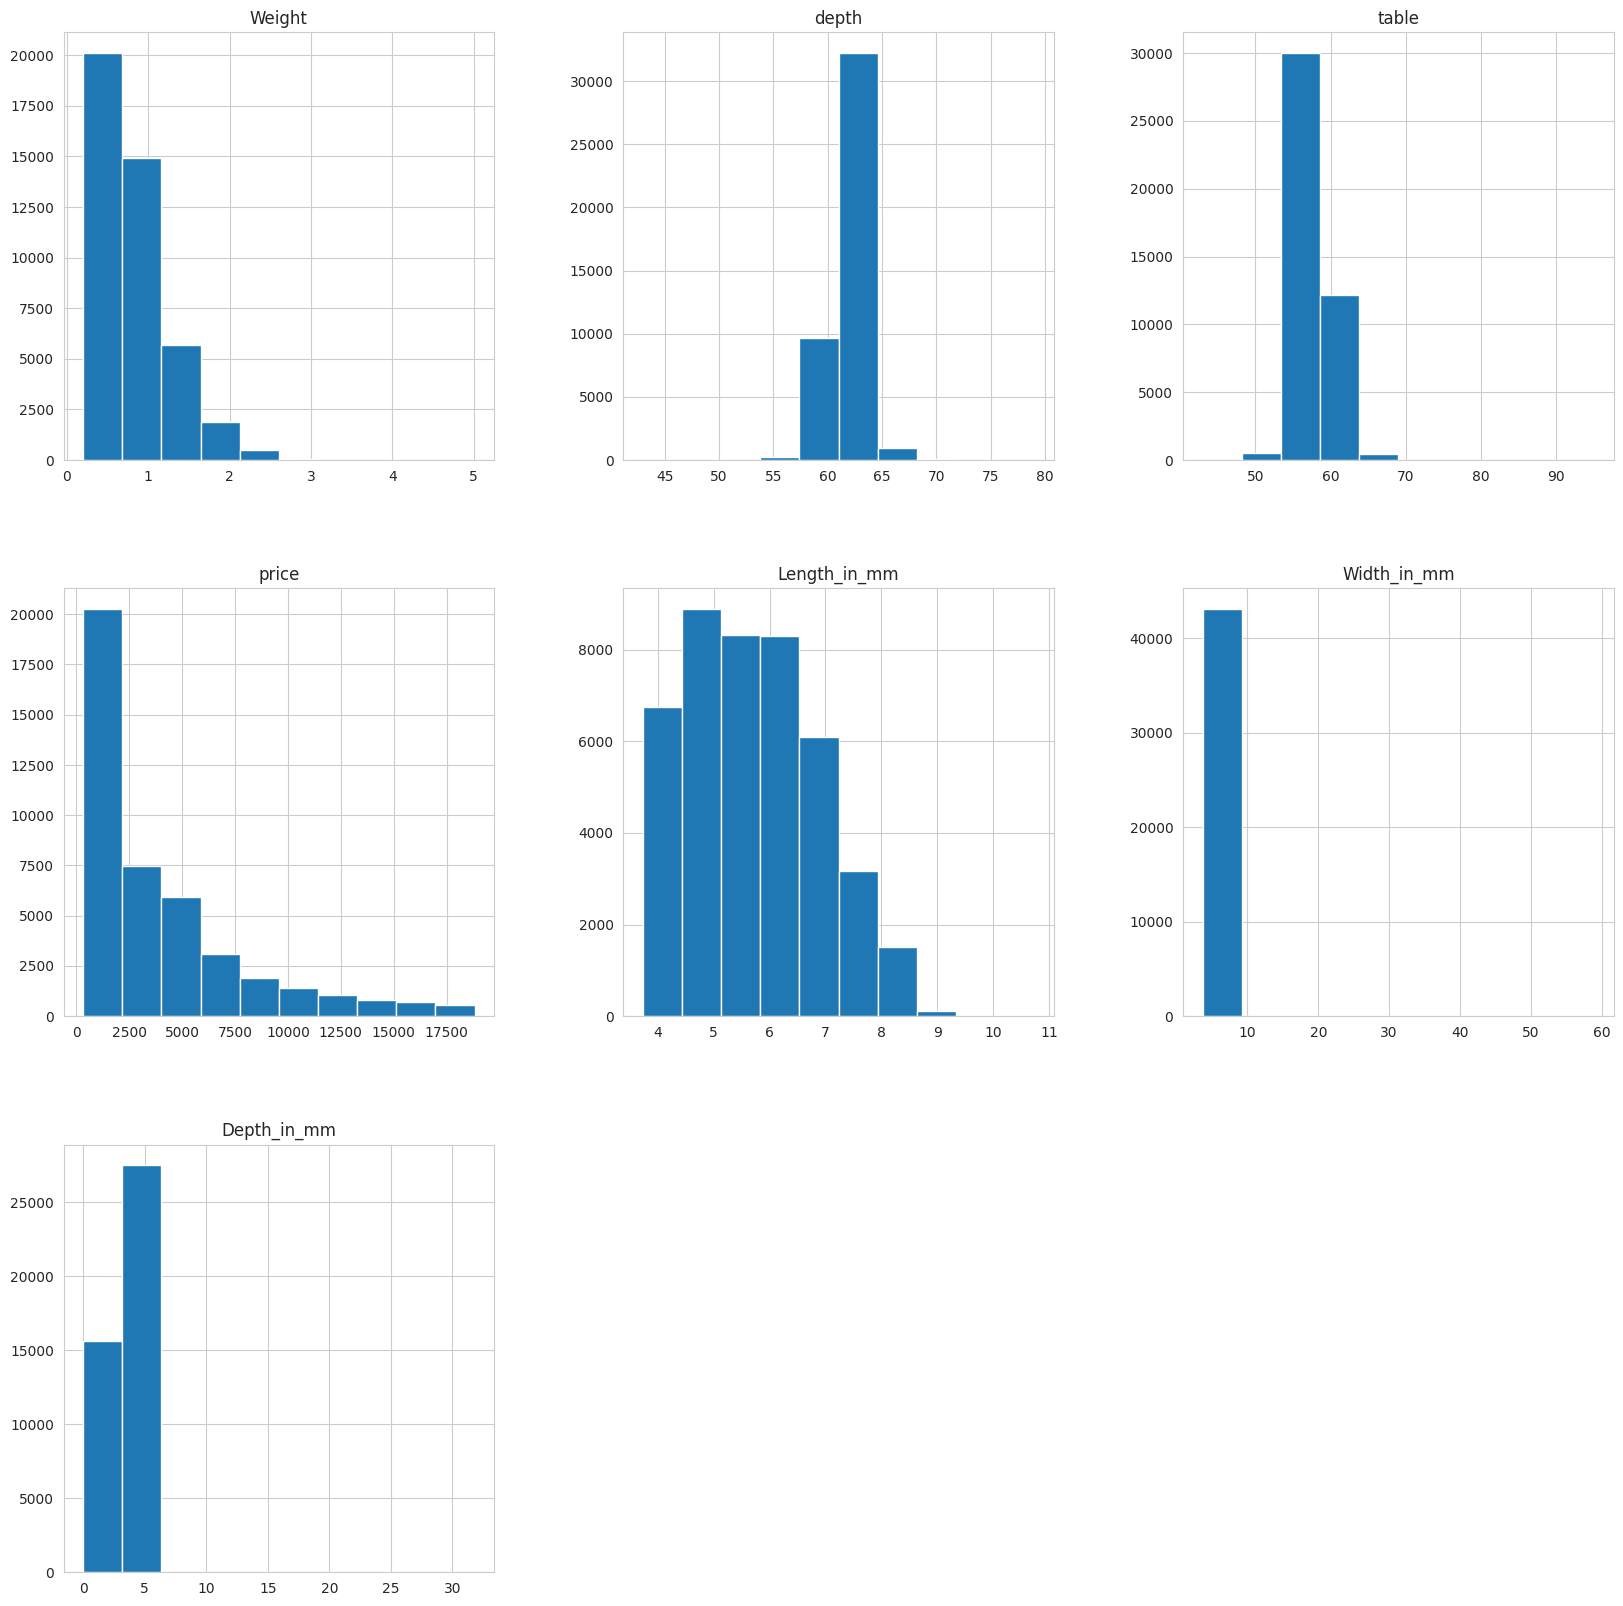

In [ ]:
df.hist(bins = 10, figsize = (20, 20))
plt.show()

Text(0.5, 1.0, 'Prices of Diamonds have SI1 & IF Clarity ')

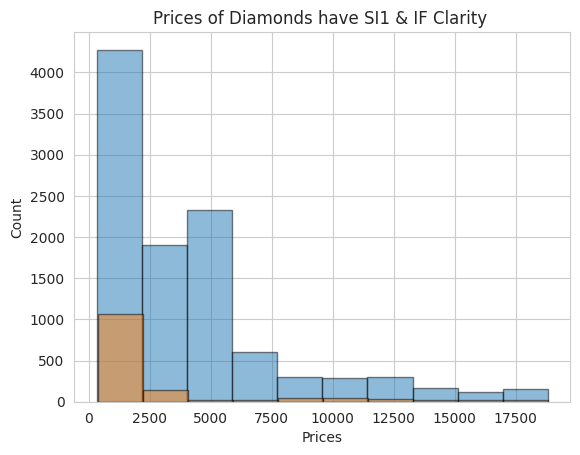

In [ ]:
s1_price = df[df.clarity == "SI1"]["price"]
IF_price = df[df.clarity == "IF"]["price"]
plt.hist(s1_price, bins = 10, edgecolor = "black", label = "SI1", alpha = 0.5)
plt.hist(IF_price , bins = 10, edgecolor = "black", label = "IF", alpha = 0.5)
plt.xlabel("Prices")
plt.ylabel("Count")
plt.title("Prices of Diamonds have SI1 & IF Clarity ")


<Axes: xlabel='clarity', ylabel='Weight'>

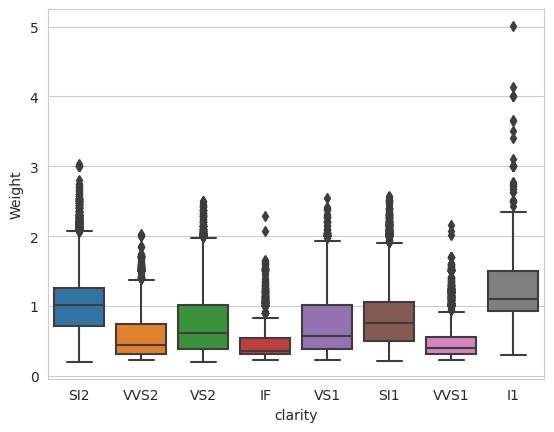

In [ ]:
# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")

sns.boxplot(x = 'clarity', y = 'Weight', data = df)


In [ ]:
df.columns

Index(['Weight', 'Quality', 'color', 'clarity', 'depth', 'table', 'price',
       'Length_in_mm', 'Width_in_mm', 'Depth_in_mm'],
      dtype='object')

In [ ]:
df.groupby(df.clarity)['Weight'].agg(["std","mean"])

,std,mean
clarity,,
I1,0.633242,1.262871
IF,0.305252,0.497982
SI1,0.451444,0.850528
SI2,0.512814,1.077288
VS1,0.424602,0.727660
VS2,0.444784,0.761273
VVS1,0.298633,0.504208
VVS2,0.360176,0.597360


<Axes: xlabel='Weight', ylabel='price'>

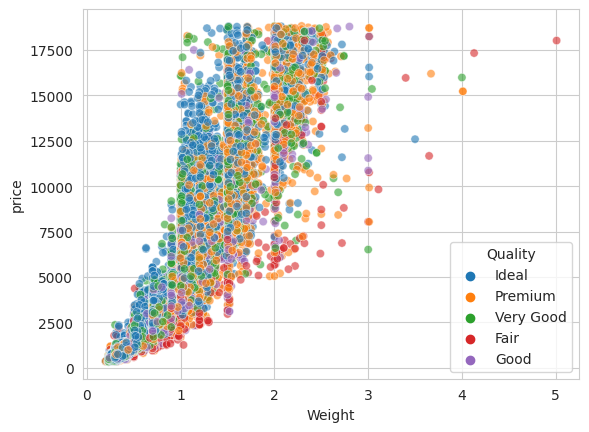

In [ ]:
sns.scatterplot(data = df, x = df.Weight, y = df.price, hue = "Quality", alpha = 0.6 )

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

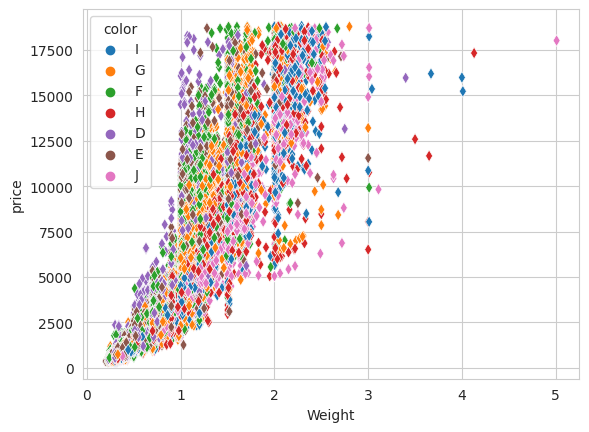

In [ ]:
sns.scatterplot(data = df, x = df.Weight, y = df.price, hue = "color" ,marker = "d",   color =['Red','Orange', 'Blue', 'brown', "black", "cyan", "green"] )
plt.xlabel

<Axes: xlabel='Weight', ylabel='price'>

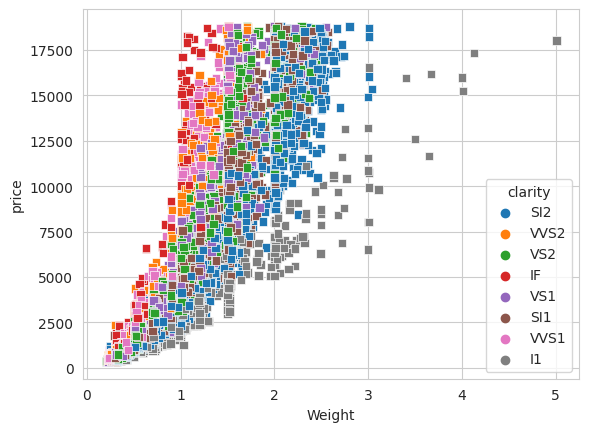

In [ ]:
sns.scatterplot(data = df, x = df.Weight, y = df.price, hue = "clarity" ,marker="s",   color =['Red','Orange', 'Blue', 'brown','yellow', "black", "cyan", "green"] )

In [ ]:
df["volume"] = df.Depth_in_mm * df.Length_in_mm * df.Width_in_mm
df.drop(["Depth_in_mm", "Length_in_mm", "Width_in_mm"], axis = 1, inplace = True)

In [ ]:
df_test["volume"] = df_test.Depth_in_mm * df_test.Length_in_mm * df_test.Width_in_mm
df_test.drop(["Depth_in_mm", "Length_in_mm", "Width_in_mm"], axis = 1, inplace = True)

# <font color = "blue" >Encoding

In [ ]:
categoryf = df.select_dtypes(include = "object").columns

In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce
counter = 0
for f in categoryf:
  # create an object of the OrdinalEncoding
  ce_ordinal = ce.OrdinalEncoder(cols=[f])
  # fit and transform and you will get the encoded data
  encode_train = ce_ordinal.fit_transform(df)
  encode_test = ce_ordinal.fit_transform(df_test)
  # encoding the featuree
  df[categoryf[counter]] = encode_train[categoryf[counter]]
  df_test[categoryf[counter]] = encode_test[categoryf[counter]]
  counter += 1




<Axes: >

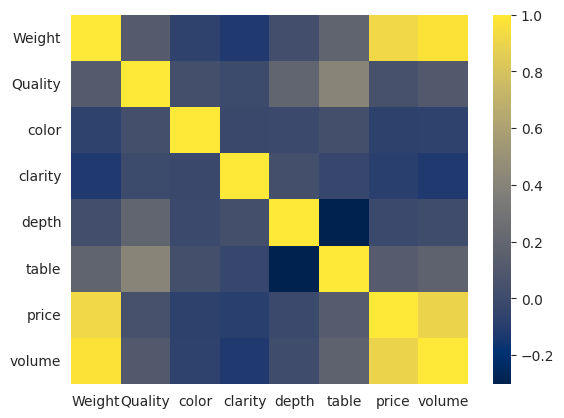

In [ ]:
sns.heatmap(df.corr(), cmap = "cividis")

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Quality', ylabel='Weight'>,
        <Axes: xlabel='color', ylabel='Weight'>,
        <Axes: xlabel='clarity', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Quality'>,
        <Axes: xlabel='Quality', ylabel='Quality'>,
        <Axes: xlabel='color', ylabel='Quality'>,
        <Axes: xlabel='clarity', ylabel='Quality'>],
       [<Axes: xlabel='Weight', ylabel='color'>,
        <Axes: xlabel='Quality', ylabel='color'>,
        <Axes: xlabel='color', ylabel='color'>,
        <Axes: xlabel='clarity', ylabel='color'>],
       [<Axes: xlabel='Weight', ylabel='clarity'>,
        <Axes: xlabel='Quality', ylabel='clarity'>,
        <Axes: xlabel='color', ylabel='clarity'>,
        <Axes: xlabel='clarity', ylabel='clarity'>]], dtype=object)

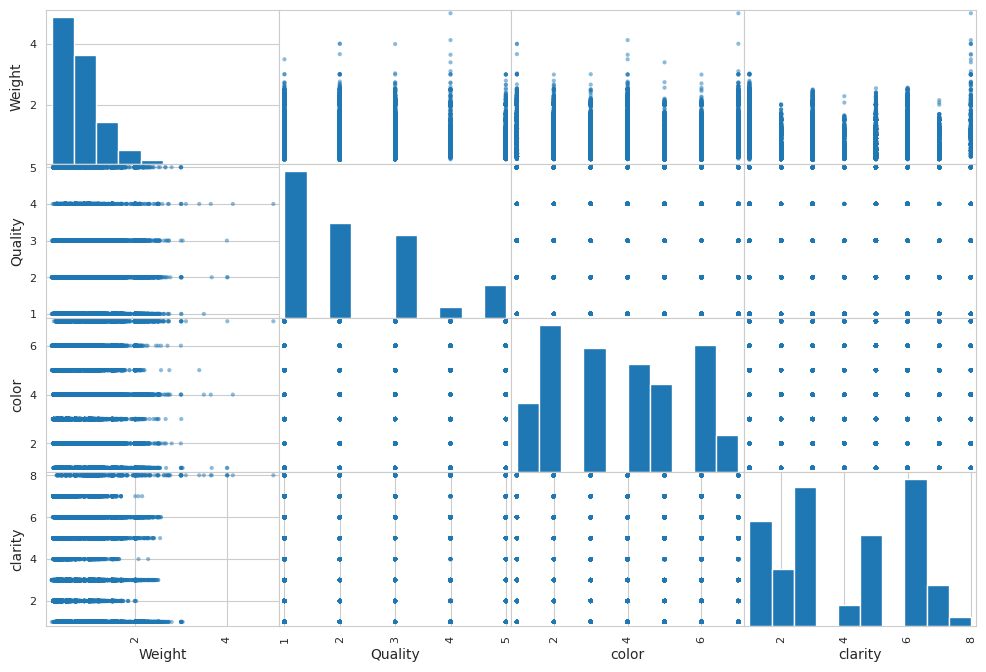

In [ ]:
from pandas.plotting import scatter_matrix

atts = df.columns[:4]
scatter_matrix(df[atts],figsize = (12,8))

# <font color = "blue" >scaling

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df.values #returns a numpy array
x_scaled = StandardScaler().fit_transform(df_test)
df_test = pd.DataFrame(x_scaled, columns = df_test.columns)

# <font color = "blue" >Train the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [ ]:
y = df["price"]
x = df.drop(['price'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 )

In [ ]:
def prediction(pipe):
  diamod_predictions = pipe.predict(x_train)
  model_mse = mean_squared_error(y_train, diamod_predictions)
  model_rmse = np.sqrt(model_mse)
  print("error ", model_rmse)
models, list_pipe = (LinearRegression, DecisionTreeRegressor, XGBRFRegressor, RandomForestRegressor), []
for model in models:
  pipe_model = Pipeline([("scaler", StandardScaler()), ("model", model() )])
  pipe_model.fit(x_train,y_train)
  list_pipe.append(pipe_model)


In [ ]:
models = ["lineaeregression", "DecisionTree", "xgb", "RandomForest"]
for model, pipe in zip(models, list_pipe) :
    print(f"---------{model}----------")
    print( "accuracy", pipe.score(x_train ,y_train))
    prediction(pipe)


---------lineaeregression----------
accuracy 0.8558327059100952
error  1516.7397077857884
---------DecisionTree----------
accuracy 0.9999403819494125
error  30.84370698234477
---------xgb----------
accuracy 0.932941305819784
error  1034.4398179019854
---------RandomForest----------
accuracy 0.9970616114048376
error  216.53709089908673


# <font color = "blue" >validation

In [ ]:
for pipe, model in zip(list_pipe, models):
    print(f"---------{model}--------")
    scores = cross_val_score(pipe , x_train.values, y_train, scoring ="neg_mean_squared_error",cv = 5)
    tree_rmse_scores = np.sqrt(-scores)
    print("Scores: ", tree_rmse_scores)
    print("Mean: ", tree_rmse_scores.mean())
    print("Standard Deviation: ", tree_rmse_scores.std())


---------lineaeregression--------
Scores:  [1503.09394672 1500.23783361 1539.25843366 1545.53434995 1498.3653213 ]
Mean:  1517.297977048333
Standard Deviation:  20.64365682321563
---------DecisionTree--------
Scores:  [768.75352452 764.22680308 821.9362283  799.64899182 784.52605446]
Mean:  787.8183204375025
Standard Deviation:  21.14171975926588
---------xgb--------
Scores:  [1038.83120702 1015.40246094 1082.5650385  1076.00934494 1009.48463601]
Mean:  1044.458537481428
Standard Deviation:  30.155115940791084
---------RandomForest--------
Scores:  [581.0573083  564.07620773 617.1139916  599.82786088 599.21922783]
Mean:  592.2589192688991
Standard Deviation:  18.128710439698285


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],


}
forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = pipe_model[-1], param_grid = param_grid ,cv = 5, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 'auto', 'n_estimators': 150}

In [ ]:
res = grid_search.cv_results_
for mean_score, params in zip(res["mean_test_score"],res["params"]):
  print(np.sqrt(-mean_score), params)

593.5235512238061 {'max_features': 'auto', 'n_estimators': 100}
592.1742231564967 {'max_features': 'auto', 'n_estimators': 150}
687.5353731239376 {'max_features': 'sqrt', 'n_estimators': 100}
683.3997877129266 {'max_features': 'sqrt', 'n_estimators': 150}
685.0272916600385 {'max_features': 'log2', 'n_estimators': 100}
683.0260519485388 {'max_features': 'log2', 'n_estimators': 150}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
X_test = df_test
forest_reg = grid_search.fit(x_train,y_train)
final_predictions = forest_reg.predict(X_test)
pred_price = pd.DataFrame(final_predictions, columns = ["price"])
pred_price["Id"] = range(1, len(final_predictions)+1)
pred_price


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

,price,Id
0,542.633333,1
1,542.633333,2
2,542.633333,3
3,542.633333,4
4,542.633333,5
...,...,...
10780,542.633333,10781
10781,543.482222,10782
10782,542.633333,10783
10783,1177.697778,10784


In [ ]:
from google.colab import files
pred_price.to_csv('pred_price.csv')
files.download('pred_price.csv')

In [ ]:
pd.read_csv("/content/pred_price.csv")